In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())
import os
os.chdir("G:/mmdetection-master/mmdetection-master/")
os.listdir()

2.1.0+cu121 True


e:\Anaconda\envs\tt\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


2.28.2
12.0
MSVC 193833133


['.circleci',
 '.dev_scripts',
 '.dist_test',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.readthedocs.yml',
 '1.3.17',
 'CITATION.cff',
 'configs',
 'debug.log',
 'demo',
 'docker',
 'docs',
 'LICENSE',
 'MANIFEST.in',
 'mmdet',
 'mmdet.egg-info',
 'model-index.yml',
 'output',
 'pytest.ini',
 'README.md',
 'README_zh-CN.md',
 'requirements',
 'requirements.txt',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tmp.jpeg',
 'tools',
 'work_dir',
 'work_dirs']

In [2]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
# Choose to use a config and initialize the detector
#config = 'configs/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco.py'
# Setup a checkpoint file to load
#checkpoint = 'work_dirs/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco/epoch_2.pth'
#config = 'work_dirs/mask_rcnn_swin-t-p4-w7_fpn_1x_hubmap/mask_rcnn_swin-t-p4-w7_fpn_1x_hubmap.py'
#checkpoint = 'work_dirs/mask_rcnn_swin-t-p4-w7_fpn_1x_hubmap/epoch_1.pth'
config = 'G:\mmdetection-master\mmdetection-master\work_dirs\cascade_mask_rcnn_r50_fpn_20e_coco/cascade_mask_rcnn_r50_fpn_20e_coco.py'
config = 'G:\mmdetection-master\mmdetection-master\work_dirs\custom_rcnn/custom_rcnn.py'
config = 'G:\mmdetection-master\mmdetection-master\work_dirs\sennet/sennet.py'
# config = 'G:\mmdetection-master\mmdetection-master\work_dirs\sennet/sennet_origin.py'
checkpoint = 'G:\mmdetection-master\mmdetection-master\work_dirs/sennet/epoch_6_512.pth'
checkpoint = 'G:\mmdetection-master\mmdetection-master\work_dirs/sennet/latest.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')


load checkpoint from local path: G:\mmdetection-master\mmdetection-master\work_dirs/sennet/latest.pth


In [12]:
img_id = 'ffd3d193c71e'
img = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_voi/images/0481.tif'

mask = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_voi/labels/0481.tif'

img = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_dense/images/0881.tif'

mask = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_dense/labels/0881.tif'

img2 = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_dense_yolo/images/0881_down.tif'

mask2 = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/sennet/train/kidney_1_dense_yolo/labels/0881_down.tif'


# img = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/hubmap/train/images/2a9e6a294e2b.tif'

# mask = f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/hubmap/train/labels/2a9e6a294e2b.tif'
result = inference_detector(model, img)
result2 = inference_detector(model, img2)

In [13]:
import cv2
img_data = cv2.imread(img)
mask_data = cv2.imread(mask)
img_data.shape, mask_data.shape

((1303, 912, 3), (1303, 912, 3))

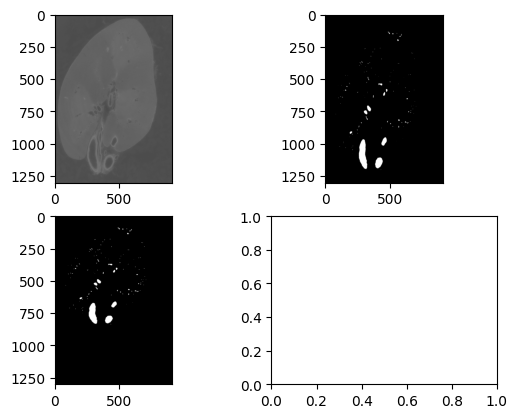

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2,2,1);plt.imshow(img_data)
plt.subplot(2,2,2);plt.imshow(mask_data)
fr = open(mask.replace("tif","txt"))

recovered = np.zeros(img_data.shape)
for line in fr.readlines():
    polygon = [float(x)*912.0 for x in line.split()[1:]]
    cv2.fillPoly(recovered, pts=np.int32(np.array(polygon).reshape(1, -1, 2)),color=(1,1,1))
plt.subplot(2,2,3);plt.imshow(recovered)
plt.subplot(2,2,4);


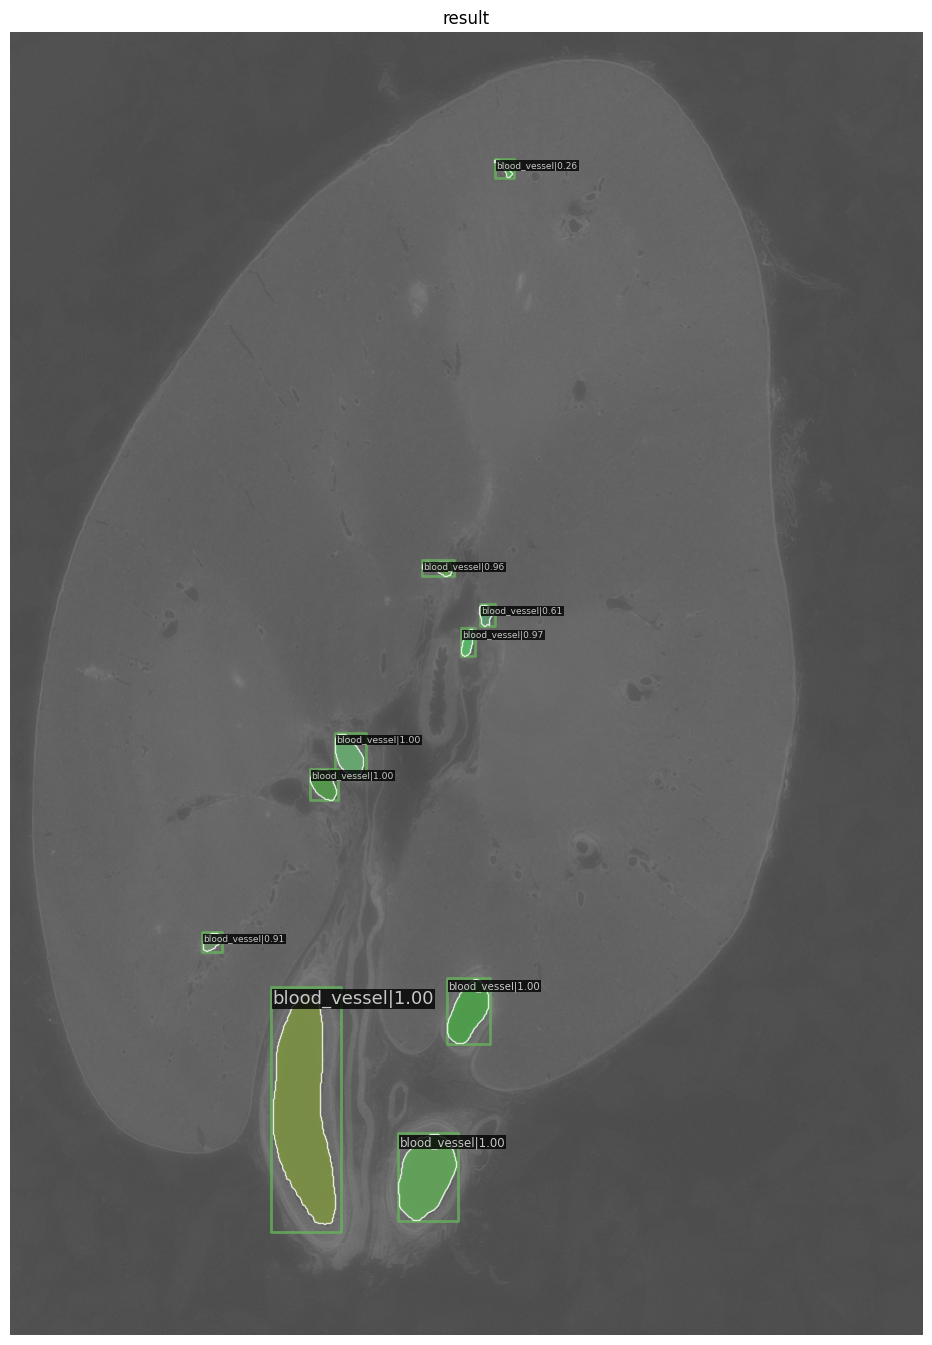

In [15]:
show_result_pyplot(model, img, result, score_thr=0.005)

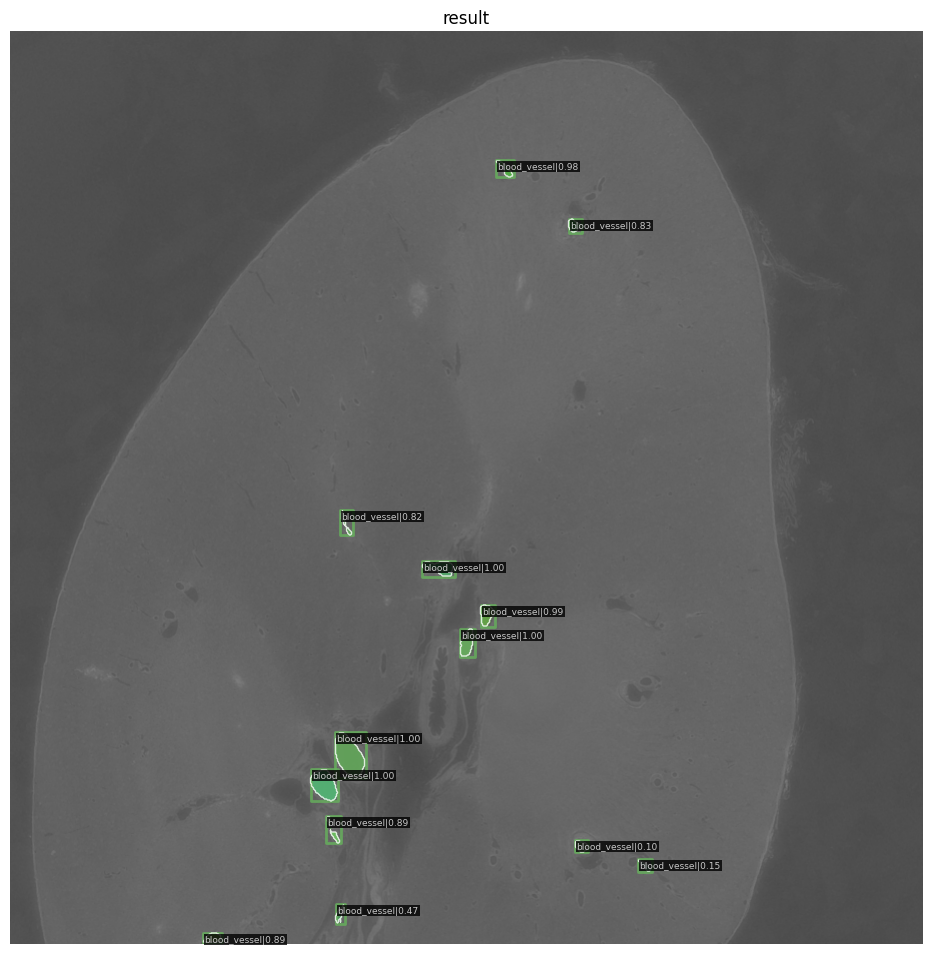

In [27]:
show_result_pyplot(model, img, result, score_thr=0.005)

In [ ]:
result[0][0]
(result[1][0][0]).shape,len(result[1][0]),result[1]

In [8]:
img

'G:\\mmdetection-master\\mmdetection-master\\mmdet\\datasets\\data\\hubmap/val/images/ffd3d193c71e.tif'

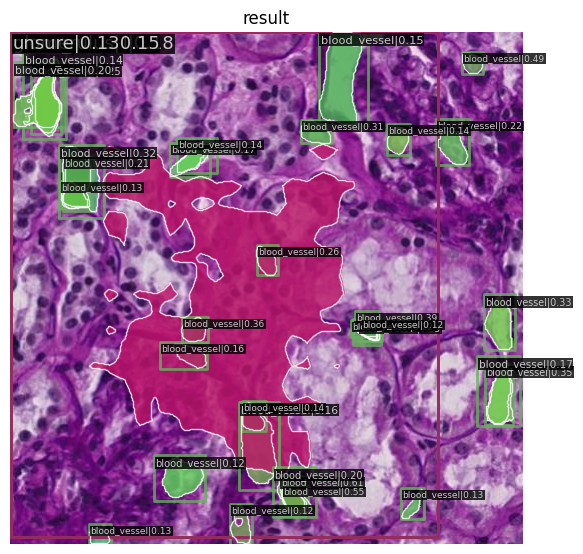

In [58]:
# 

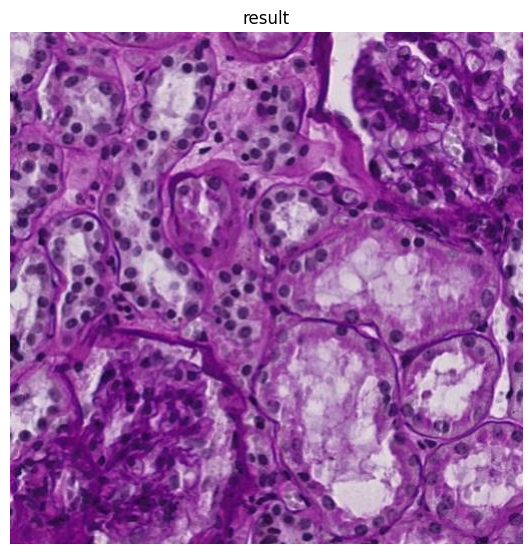

In [53]:
show_result_pyplot(model_3, img, result_3, score_thr=0.12)


In [22]:
p_s = glob("G:/rsna-2023-abdominal-trauma-detection/train_images/*/*")

s_id_p_id = {x.split("\\")[-1]:x.split("\\")[-2] for x in p_s}
s_id_p_id["10006"]


KeyError: '10006'

In [119]:
import numpy as np
import pydicom as dicom
def load_dicom(path):
    """
    This supports loading both regular and compressed JPEG images. 
    See the first sell with `pip install` commands for the necessary dependencies
    """
    img = dicom.dcmread(path)
    img.PhotometricInterpretation = 'YBR_FULL'
    data = img.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    # data = (data * 255).astype(np.uint8)
    return data

img_paths = glob(f"G:/rsna-2023-abdominal-trauma-detection/train_images/9555/10006/*")
img_path = sorted(img_paths, key=lambda x:int(x.split("\\")[-1].replace(".dcm","")))[40]

In [ ]:
import cv2
img_tmp = load_dicom(img_path)

cv2.imwrite(f"tmp.jpeg",cv2.cvtColor((img_tmp*255).astype(np.uint8), cv2.COLOR_GRAY2RGB))
result_3 = inference_detector(model_3, f"tmp.jpeg")

show_result_pyplot(model_3, f"tmp.jpeg", result_3, score_thr=0.12)


In [125]:
import torch
len(result_3[1])
mmdet_pred = np.array([np.sum(x,axis=0) if len(x)>0 else np.zeros((512,512)) for x in result_3[1]])
slice_mask_max2 = torch.max(torch.from_numpy(np.array(mmdet_pred)), 0) # bs*img_size*img_size
slice_mask2 = torch.where((slice_mask_max2.values)>0.5, slice_mask_max2.indices+1, 0) # bs*img_size*img_size; 0-8 classes
slice_mask = torch.where(slice_mask2==8,0,slice_mask2).type(torch.uint8)

In [24]:
rsna_name = rsna_imgs[-24000].split("\\")[-1].split(".")[0]

f = open(f'G:\mmdetection-master\mmdetection-master\mmdet\datasets\data/rsna/train/labels/{rsna_name}.txt', encoding="cp860")
mask_poly = f.readlines()
mask_poly = [x.split() for x in mask_poly]
labels = [int(x[0]) for x in mask_poly]
mask_poly = [[float(x) for x in y[1:]] for y in mask_poly]
gt_masks = mask_poly

In [26]:
labels
#'bowel', 'kidney', 'extravasation','liver', 'spleen'
#'liver', 'spleen', 'lkidney','rkidney', 'bowel'
label_to_color = [[0,128,128],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255]]

5
2275
5
2913
5
122


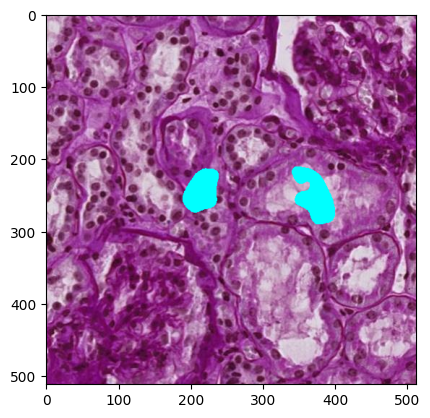

In [27]:
import matplotlib.pyplot as plt 
import cv2
img_data = cv2.imread(img)
import copy
img_masked = copy.deepcopy(img_data)
import numpy as np


mask_background = np.zeros((len(img_data), len(img_data[0])), dtype=np.uint8)
for idx in range(len(gt_masks)):
    #if idx>4: continue
    mask_img = cv2.fillPoly(np.zeros((len(img_data), len(img_data[0])), dtype=np.uint8),\
         pts=np.int32(np.array(gt_masks[idx]).reshape(1, -1, 2)),color=(128,128,128))
    print(labels[idx])
    print(np.sum(mask_img==128))
    for i in range(len(img_masked)):
        for j in range(len(img_masked[0])):
            if mask_img[i][j] != 0:
                img_masked[i][j]=label_to_color[labels[idx]]
    #img_masked = cv2.rectangle(np.array(img_masked), np.int32(bboxes[idx][2:]),np.int32(bboxes[idx][:2]), color=(0,255,0), thickness=2)
plt.imshow(img_masked)


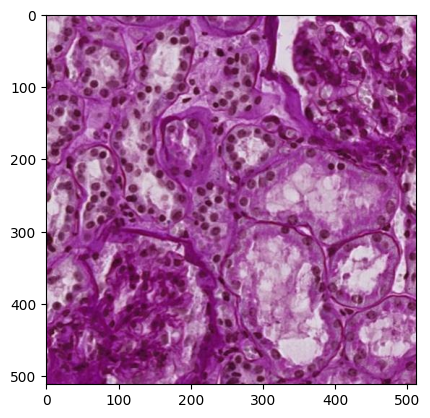

In [139]:
img = f'E:\mmdetection-master\mmdetection-master\mmdet\datasets\data\hubmap/val/images/{img_id}.tif'

cv2.imread(img).shape
plt.imshow(cv2.imread(img))

In [ ]:
img = f'E:\mmdetection-master\mmdetection-master\mmdet\datasets\data\hubmap/val/images/{img_id}.tif'

cv2.imread(img)


In [ ]:
img = f'E:\mmdetection-master\mmdetection-master\mmdet\datasets\data/rsna/train/images/{rsna_name}.jpeg'

cv2.imread(img)#.shape
#plt.imshow(cv2.imread(img))

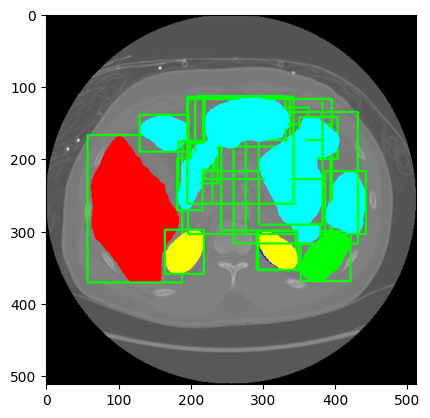

In [142]:
import matplotlib.pyplot as plt 
import cv2
img_data = cv2.imread(img)
import copy
img_masked = copy.deepcopy(img_data)
import numpy as np


mask_background = np.zeros((len(img_data), len(img_data[0])), dtype=np.uint8)
for class_id in range(len(result_3[0])):
    #if idx>4: continue
    for idx in range(len(result_3[0][class_id])):
        result_img = result_3[1][class_id][idx]
        bbox = result_3[0][class_id][idx]
        if result_3[0][class_id][idx][4]<0.12:continue
        img_masked[:,:,0] = np.where(result_img!=0, label_to_color[class_id][0], img_masked[:,:,0])
        img_masked[:,:,1] = np.where(result_img!=0, label_to_color[class_id][1], img_masked[:,:,1])
        img_masked[:,:,2] = np.where(result_img!=0, label_to_color[class_id][2], img_masked[:,:,2])
        img_masked = cv2.rectangle(np.array(img_masked), np.int32(bbox[:2]),np.int32(bbox[2:4]), color=(0,255,0), thickness=2)
plt.imshow(img_masked)


In [62]:
len(result_3[1][1])

512

In [59]:
len(result_3[1][0])
#len(result_3[1][1])
#len(result_3[1][2])

15

In [143]:
(result_3[0][0][3])
result_3[0][0][3]

IndexError: index 3 is out of bounds for axis 0 with size 0

In [144]:
rsna_img

'E:\\mmdetection-master\\mmdetection-master\\mmdet\\datasets\\data/rsna/train\\images/32425_26840_382.jpeg'

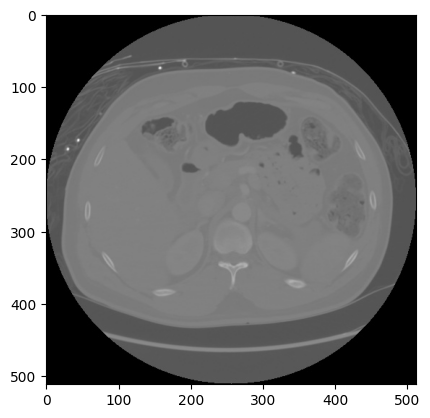

In [145]:
import cv2
import matplotlib.pyplot as plt

cv2.imread(img).shape

result_img = cv2.imread(f'E:\\mmdetection-master\\mmdetection-master\\mmdet\\datasets\\data/rsna/train\\images/{rsna_name}.jpeg')
plt.imshow(result_img)

In [ ]:
result_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [146]:
show_result_pyplot(model_7, img, result_7, score_thr=0.3)


NameError: name 'model_7' is not defined

In [147]:
show_result_pyplot(model_9, img, result_9, score_thr=0.3)


NameError: name 'model_9' is not defined

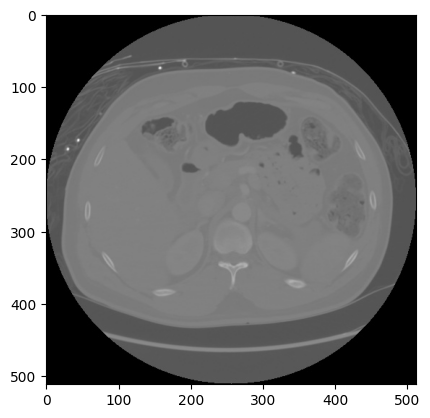

In [148]:
plt.imshow(img_data)

In [ ]:
os.listdir()

['.circleci',
 '.dev_scripts',
 '.dist_test',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.readthedocs.yml',
 '1.3.17',
 'CITATION.cff',
 'configs',
 'debug.log',
 'demo',
 'docker',
 'docs',
 'LICENSE',
 'MANIFEST.in',
 'mmdet',
 'mmdet.egg-info',
 'model-index.yml',
 'output',
 'pytest.ini',
 'README.md',
 'README_zh-CN.md',
 'requirements',
 'requirements.txt',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'work_dir',
 'work_dirs']

In [149]:
f = open(f"mmdet/datasets/data/hubmap/val/labels/{img_id}.txt", encoding="cp860")
mask_poly = f.readlines()
mask_poly = [x.split() for x in mask_poly]
labels = [int(x[0]) for x in mask_poly]
mask_poly = [[int(x) for x in y[1:]] for y in mask_poly]

In [ ]:
labels

[1, 1, 1, 1, 0, 0, 0, 0, 0]

In [ ]:
bboxes =[[307.,   0., 511., 193.],
       [307.,   0., 511., 193.],
       [ 25., 297., 236., 511.],
       [ 25., 297., 236., 511.],
       [173., 285., 195., 308.],
       [ 28.,  33.,  48.,  92.],
       [273., 459., 296., 480.],
       [476., 269., 500., 388.],
       [ 54.,   0.,  68.,  15.]]
gt_masks = [[[450, 193, 449, 193, 448, 193, 447, 193, 446, 193, 445, 193, 444, 193, 443, 193, 442, 193, 441, 193, 440, 193, 439, 193, 438, 193, 437, 193, 436, 193, 435, 193, 434, 193, 433, 193, 432, 193, 432, 192, 431, 192, 430, 192, 429, 192, 428, 192, 427, 192, 426, 192, 425, 192, 424, 192, 423, 192, 422, 192, 421, 192, 420, 192, 419, 192, 418, 192, 418, 191, 417, 191, 416, 191, 415, 191, 414, 191, 413, 191, 413, 190, 412, 190, 411, 190, 410, 190, 410, 189, 409, 189, 408, 189, 407, 189, 406, 189, 405, 189, 405, 188, 404, 188, 403, 188, 402, 188, 402, 187, 401, 187, 400, 187, 400, 186, 399, 186, 398, 186, 398, 185, 397, 185, 396, 185, 396, 184, 395, 184, 395, 183, 394, 183, 393, 183, 392, 183, 392, 182, 391, 182, 390, 182, 389, 182, 388, 182, 388, 181, 387, 181, 387, 180, 386, 180, 385, 180, 385, 179, 384, 179, 383, 179, 383, 178, 382, 178, 381, 178, 381, 177, 380, 177, 380, 176, 379, 176, 378, 176, 377, 176, 377, 175, 376, 175, 375, 175, 375, 174, 374, 174, 374, 173, 373, 173, 373, 172, 372, 172, 372, 171, 371, 171, 371, 170, 370, 170, 369, 170, 369, 169, 368, 169, 368, 168, 367, 168, 367, 167, 366, 167, 366, 166, 365, 166, 364, 166, 364, 165, 363, 165, 363, 164, 362, 164, 362, 163, 361, 163, 361, 162, 360, 162, 360, 161, 360, 160, 359, 160, 359, 159, 358, 159, 358, 158, 357, 158, 357, 157, 356, 157, 356, 156, 355, 156, 355, 155, 355, 154, 354, 154, 354, 153, 353, 153, 353, 152, 353, 151, 352, 151, 351, 151, 351, 150, 350, 150, 349, 150, 349, 149, 349, 148, 348, 148, 348, 147, 348, 146, 347, 146, 347, 145, 346, 145, 346, 144, 345, 144, 345, 143, 344, 143, 344, 142, 343, 142, 343, 141, 342, 141, 342, 140, 342, 139, 341, 139, 341, 138, 341, 137, 340, 137, 340, 136, 339, 136, 339, 135, 338, 135, 338, 134, 338, 133, 337, 133, 337, 132, 336, 132, 336, 131, 335, 131, 335, 130, 335, 129, 335, 128, 334, 128, 334, 127, 334, 126, 333, 126, 333, 125, 332, 125, 332, 124, 332, 123, 332, 122, 331, 122, 331, 121, 331, 120, 331, 119, 330, 119, 330, 118, 330, 117, 329, 117, 329, 116, 329, 115, 329, 114, 328, 114, 328, 113, 328, 112, 328, 111, 327, 111, 327, 110, 326, 110, 326, 109, 326, 108, 325, 108, 325, 107, 325, 106, 324, 106, 324, 105, 324, 104, 323, 104, 323, 103, 322, 103, 322, 102, 322, 101, 322, 100, 321, 100, 321, 99, 320, 99, 320, 98, 319, 98, 319, 97, 319, 96, 319, 95, 318, 95, 318, 94, 317, 94, 317, 93, 316, 93, 316, 92, 316, 91, 315, 91, 315, 90, 315, 89, 314, 89, 314, 88, 313, 88, 313, 87, 313, 86, 312, 86, 312, 85, 311, 85, 311, 84, 311, 83, 310, 83, 310, 82, 310, 81, 309, 81, 309, 80, 309, 79, 309, 78, 309, 77, 309, 76, 308, 76, 308, 75, 308, 74, 308, 73, 308, 72, 307, 72, 307, 71, 307, 70, 307, 69, 307, 68, 307, 67, 307, 66, 307, 65, 307, 64, 307, 63, 307, 62, 307, 61, 307, 60, 307, 59, 307, 58, 307, 57, 307, 56, 307, 55, 307, 54, 307, 53, 307, 52, 307, 51, 307, 50, 307, 49, 307, 48, 307, 47, 307, 46, 307, 45, 307, 44, 307, 43, 307, 42, 307, 41, 307, 40, 307, 39, 308, 38, 308, 38, 308, 37, 308, 36, 308, 35, 308, 34, 308, 33, 308, 32, 309, 31, 309, 31, 309, 30, 309, 29, 309, 28, 309, 27, 309, 26, 309, 25, 309, 24, 309, 23, 309, 22, 309, 21, 309, 20, 309, 19, 309, 18, 309, 17, 309, 16, 309, 15, 309, 14, 310, 13, 310, 13, 310, 12, 310, 11, 310, 10, 311, 9, 311, 9, 311, 8, 311, 7, 312, 6, 312, 6, 312, 5, 312, 4, 313, 3, 313, 3, 313, 2, 313, 1, 314, 0, 315, 0, 316, 0, 317, 0, 318, 0, 319, 0, 320, 0, 321, 0, 322, 0, 323, 0, 324, 0, 325, 0, 326, 0, 327, 0, 328, 0, 329, 0, 330, 0, 331, 0, 332, 0, 333, 0, 334, 0, 335, 0, 336, 0, 337, 0, 338, 0, 339, 0, 340, 0, 341, 0, 342, 0, 343, 0, 344, 0, 345, 0, 346, 0, 347, 0, 348, 0, 349, 0, 350, 0, 351, 0, 352, 0, 353, 0, 354, 0, 355, 0, 356, 0, 357, 0, 358, 0, 359, 0, 360, 0, 361, 0, 362, 0, 363, 0, 364, 0, 365, 0, 366, 0, 367, 0, 368, 0, 369, 0, 370, 0, 371, 0, 372, 0, 373, 0, 374, 0, 375, 0, 376, 0, 377, 0, 378, 0, 379, 0, 380, 0, 381, 0, 382, 0, 383, 0, 384, 0, 385, 0, 386, 0, 387, 0, 388, 0, 389, 0, 390, 0, 391, 0, 392, 0, 393, 0, 394, 0, 395, 0, 396, 0, 397, 0, 398, 0, 399, 0, 400, 0, 401, 0, 402, 0, 403, 0, 404, 0, 405, 0, 406, 0, 407, 0, 408, 0, 409, 0, 410, 0, 411, 0, 412, 0, 413, 0, 414, 0, 415, 0, 416, 0, 417, 0, 418, 0, 419, 0, 420, 0, 421, 0, 422, 0, 423, 0, 424, 0, 425, 0, 426, 0, 427, 0, 428, 0, 429, 0, 430, 0, 431, 0, 432, 0, 433, 0, 434, 0, 435, 0, 436, 0, 437, 0, 438, 0, 439, 0, 440, 0, 441, 0, 442, 0, 443, 0, 444, 0, 445, 0, 446, 0, 447, 0, 448, 0, 449, 0, 450, 0, 451, 0, 452, 0, 453, 0, 454, 0, 455, 0, 456, 0, 457, 0, 458, 0, 459, 0, 460, 0, 461, 0, 462, 0, 463, 0, 464, 0, 465, 0, 466, 0, 467, 0, 468, 0, 469, 0, 470, 0, 471, 0, 472, 0, 473, 0, 474, 0, 475, 0, 476, 0, 477, 0, 478, 0, 479, 0, 480, 0, 481, 0, 482, 0, 483, 0, 484, 0, 485, 0, 486, 0, 487, 0, 488, 0, 489, 0, 490, 0, 491, 0, 492, 0, 493, 0, 494, 0, 495, 0, 496, 0, 497, 0, 498, 0, 499, 0, 500, 0, 501, 0, 502, 0, 503, 0, 504, 0, 505, 0, 506, 0, 507, 0, 508, 0, 509, 0, 510, 0, 511, 0, 511, 0, 511, 1, 511, 2, 511, 3, 511, 4, 511, 5, 511, 6, 511, 7, 511, 8, 511, 9, 511, 10, 511, 11, 511, 12, 511, 13, 511, 14, 511, 15, 511, 16, 511, 17, 511, 18, 511, 19, 511, 20, 511, 21, 511, 22, 511, 23, 511, 24, 511, 25, 511, 26, 511, 27, 511, 28, 511, 29, 511, 30, 511, 31, 511, 32, 511, 33, 511, 34, 511, 35, 511, 36, 511, 37, 511, 38, 511, 39, 511, 40, 511, 41, 511, 42, 511, 43, 511, 44, 511, 45, 511, 46, 511, 47, 511, 48, 511, 49, 511, 50, 511, 51, 511, 52, 511, 53, 511, 54, 511, 55, 511, 56, 511, 57, 511, 58, 511, 59, 511, 60, 511, 61, 511, 62, 511, 63, 511, 64, 511, 65, 511, 66, 511, 67, 511, 68, 511, 69, 511, 70, 511, 71, 511, 72, 511, 73, 511, 74, 511, 75, 511, 76, 511, 77, 511, 78, 511, 79, 511, 80, 511, 81, 511, 82, 511, 83, 511, 84, 511, 85, 511, 86, 511, 87, 511, 88, 511, 89, 511, 90, 511, 91, 511, 92, 511, 93, 511, 94, 511, 95, 511, 96, 511, 97, 511, 98, 511, 99, 511, 100, 511, 101, 511, 102, 511, 103, 511, 104, 511, 105, 511, 106, 511, 107, 511, 108, 511, 109, 511, 110, 511, 111, 511, 112, 511, 113, 511, 114, 511, 115, 511, 116, 511, 117, 511, 118, 511, 119, 511, 120, 511, 121, 511, 122, 511, 123, 511, 124, 511, 125, 511, 126, 511, 127, 511, 128, 511, 129, 511, 130, 511, 131, 511, 132, 511, 133, 511, 134, 511, 135, 511, 136, 511, 137, 511, 138, 511, 139, 511, 140, 511, 141, 511, 142, 511, 143, 511, 144, 511, 145, 511, 146, 511, 147, 511, 148, 511, 149, 511, 150, 511, 151, 511, 152, 511, 153, 511, 154, 511, 155, 511, 156, 511, 157, 511, 158, 511, 159, 511, 160, 511, 161, 511, 162, 511, 163, 511, 163, 511, 164, 511, 164, 510, 165, 510, 165, 509, 166, 509, 166, 508, 167, 508, 167, 507, 167, 506, 168, 506, 168, 505, 169, 505, 169, 504, 170, 504, 170, 503, 170, 502, 171, 502, 171, 501, 172, 501, 172, 500, 173, 500, 173, 499, 174, 499, 174, 498, 174, 497, 175, 497, 175, 496, 176, 496, 176, 495, 176, 494, 177, 494, 177, 493, 178, 493, 178, 492, 179, 492, 179, 491, 179, 490, 179, 489, 180, 489, 180, 488, 180, 487, 181, 487, 181, 486, 182, 486, 182, 485, 182, 484, 182, 483, 183, 483, 183, 482, 183, 481, 183, 480, 184, 480, 184, 479, 184, 478, 185, 478, 185, 477, 185, 476, 186, 476, 186, 475, 186, 474, 186, 473, 187, 473, 187, 472, 187, 471, 188, 471, 188, 470, 188, 469, 189, 469, 189, 468, 189, 467, 189, 466, 190, 466, 190, 465, 190, 464, 190, 463, 190, 462, 190, 461, 191, 461, 191, 460, 191, 459, 191, 458, 191, 457, 192, 457, 192, 456, 192, 455, 192, 454, 192, 453, 192, 452, 192, 451, 192, 450, 193, 450, 193]], [[450, 193, 449, 193, 448, 193, 447, 193, 446, 193, 445, 193, 444, 193, 443, 193, 442, 193, 441, 193, 440, 193, 439, 193, 438, 193, 437, 193, 436, 193, 435, 193, 434, 193, 433, 193, 432, 193, 432, 192, 431, 192, 430, 192, 429, 192, 428, 192, 427, 192, 426, 192, 425, 192, 424, 192, 423, 192, 422, 192, 421, 192, 420, 192, 419, 192, 418, 192, 418, 191, 417, 191, 416, 191, 415, 191, 414, 191, 413, 191, 413, 190, 412, 190, 411, 190, 410, 190, 410, 189, 409, 189, 408, 189, 407, 189, 406, 189, 405, 189, 405, 188, 404, 188, 403, 188, 402, 188, 402, 187, 401, 187, 400, 187, 400, 186, 399, 186, 398, 186, 398, 185, 397, 185, 396, 185, 396, 184, 395, 184, 395, 183, 394, 183, 393, 183, 392, 183, 392, 182, 391, 182, 390, 182, 389, 182, 388, 182, 388, 181, 387, 181, 387, 180, 386, 180, 385, 180, 385, 179, 384, 179, 383, 179, 383, 178, 382, 178, 381, 178, 381, 177, 380, 177, 380, 176, 379, 176, 378, 176, 377, 176, 377, 175, 376, 175, 375, 175, 375, 174, 374, 174, 374, 173, 373, 173, 373, 172, 372, 172, 372, 171, 371, 171, 371, 170, 370, 170, 369, 170, 369, 169, 368, 169, 368, 168, 367, 168, 367, 167, 366, 167, 366, 166, 365, 166, 364, 166, 364, 165, 363, 165, 363, 164, 362, 164, 362, 163, 361, 163, 361, 162, 360, 162, 360, 161, 360, 160, 359, 160, 359, 159, 358, 159, 358, 158, 357, 158, 357, 157, 356, 157, 356, 156, 355, 156, 355, 155, 355, 154, 354, 154, 354, 153, 353, 153, 353, 152, 353, 151, 352, 151, 351, 151, 351, 150, 350, 150, 349, 150, 349, 149, 349, 148, 348, 148, 348, 147, 348, 146, 347, 146, 347, 145, 346, 145, 346, 144, 345, 144, 345, 143, 344, 143, 344, 142, 343, 142, 343, 141, 342, 141, 342, 140, 342, 139, 341, 139, 341, 138, 341, 137, 340, 137, 340, 136, 339, 136, 339, 135, 338, 135, 338, 134, 338, 133, 337, 133, 337, 132, 336, 132, 336, 131, 335, 131, 335, 130, 335, 129, 335, 128, 334, 128, 334, 127, 334, 126, 333, 126, 333, 125, 332, 125, 332, 124, 332, 123, 332, 122, 331, 122, 331, 121, 331, 120, 331, 119, 330, 119, 330, 118, 330, 117, 329, 117, 329, 116, 329, 115, 329, 114, 328, 114, 328, 113, 328, 112, 328, 111, 327, 111, 327, 110, 326, 110, 326, 109, 326, 108, 325, 108, 325, 107, 325, 106, 324, 106, 324, 105, 324, 104, 323, 104, 323, 103, 322, 103, 322, 102, 322, 101, 322, 100, 321, 100, 321, 99, 320, 99, 320, 98, 319, 98, 319, 97, 319, 96, 319, 95, 318, 95, 318, 94, 317, 94, 317, 93, 316, 93, 316, 92, 316, 91, 315, 91, 315, 90, 315, 89, 314, 89, 314, 88, 313, 88, 313, 87, 313, 86, 312, 86, 312, 85, 311, 85, 311, 84, 311, 83, 310, 83, 310, 82, 310, 81, 309, 81, 309, 80, 309, 79, 309, 78, 309, 77, 309, 76, 308, 76, 308, 75, 308, 74, 308, 73, 308, 72, 307, 72, 307, 71, 307, 70, 307, 69, 307, 68, 307, 67, 307, 66, 307, 65, 307, 64, 307, 63, 307, 62, 307, 61, 307, 60, 307, 59, 307, 58, 307, 57, 307, 56, 307, 55, 307, 54, 307, 53, 307, 52, 307, 51, 307, 50, 307, 49, 307, 48, 307, 47, 307, 46, 307, 45, 307, 44, 307, 43, 307, 42, 307, 41, 307, 40, 307, 39, 308, 38, 308, 38, 308, 37, 308, 36, 308, 35, 308, 34, 308, 33, 308, 32, 309, 31, 309, 31, 309, 30, 309, 29, 309, 28, 309, 27, 309, 26, 309, 25, 309, 24, 309, 23, 309, 22, 309, 21, 309, 20, 309, 19, 309, 18, 309, 17, 309, 16, 309, 15, 309, 14, 310, 13, 310, 13, 310, 12, 310, 11, 310, 10, 311, 9, 311, 9, 311, 8, 311, 7, 312, 6, 312, 6, 312, 5, 312, 4, 313, 3, 313, 3, 313, 2, 313, 1, 314, 0, 315, 0, 316, 0, 317, 0, 318, 0, 319, 0, 320, 0, 321, 0, 322, 0, 323, 0, 324, 0, 325, 0, 326, 0, 327, 0, 328, 0, 329, 0, 330, 0, 331, 0, 332, 0, 333, 0, 334, 0, 335, 0, 336, 0, 337, 0, 338, 0, 339, 0, 340, 0, 341, 0, 342, 0, 343, 0, 344, 0, 345, 0, 346, 0, 347, 0, 348, 0, 349, 0, 350, 0, 351, 0, 352, 0, 353, 0, 354, 0, 355, 0, 356, 0, 357, 0, 358, 0, 359, 0, 360, 0, 361, 0, 362, 0, 363, 0, 364, 0, 365, 0, 366, 0, 367, 0, 368, 0, 369, 0, 370, 0, 371, 0, 372, 0, 373, 0, 374, 0, 375, 0, 376, 0, 377, 0, 378, 0, 379, 0, 380, 0, 381, 0, 382, 0, 383, 0, 384, 0, 385, 0, 386, 0, 387, 0, 388, 0, 389, 0, 390, 0, 391, 0, 392, 0, 393, 0, 394, 0, 395, 0, 396, 0, 397, 0, 398, 0, 399, 0, 400, 0, 401, 0, 402, 0, 403, 0, 404, 0, 405, 0, 406, 0, 407, 0, 408, 0, 409, 0, 410, 0, 411, 0, 412, 0, 413, 0, 414, 0, 415, 0, 416, 0, 417, 0, 418, 0, 419, 0, 420, 0, 421, 0, 422, 0, 423, 0, 424, 0, 425, 0, 426, 0, 427, 0, 428, 0, 429, 0, 430, 0, 431, 0, 432, 0, 433, 0, 434, 0, 435, 0, 436, 0, 437, 0, 438, 0, 439, 0, 440, 0, 441, 0, 442, 0, 443, 0, 444, 0, 445, 0, 446, 0, 447, 0, 448, 0, 449, 0, 450, 0, 451, 0, 452, 0, 453, 0, 454, 0, 455, 0, 456, 0, 457, 0, 458, 0, 459, 0, 460, 0, 461, 0, 462, 0, 463, 0, 464, 0, 465, 0, 466, 0, 467, 0, 468, 0, 469, 0, 470, 0, 471, 0, 472, 0, 473, 0, 474, 0, 475, 0, 476, 0, 477, 0, 478, 0, 479, 0, 480, 0, 481, 0, 482, 0, 483, 0, 484, 0, 485, 0, 486, 0, 487, 0, 488, 0, 489, 0, 490, 0, 491, 0, 492, 0, 493, 0, 494, 0, 495, 0, 496, 0, 497, 0, 498, 0, 499, 0, 500, 0, 501, 0, 502, 0, 503, 0, 504, 0, 505, 0, 506, 0, 507, 0, 508, 0, 509, 0, 510, 0, 511, 0, 511, 0, 511, 1, 511, 2, 511, 3, 511, 4, 511, 5, 511, 6, 511, 7, 511, 8, 511, 9, 511, 10, 511, 11, 511, 12, 511, 13, 511, 14, 511, 15, 511, 16, 511, 17, 511, 18, 511, 19, 511, 20, 511, 21, 511, 22, 511, 23, 511, 24, 511, 25, 511, 26, 511, 27, 511, 28, 511, 29, 511, 30, 511, 31, 511, 32, 511, 33, 511, 34, 511, 35, 511, 36, 511, 37, 511, 38, 511, 39, 511, 40, 511, 41, 511, 42, 511, 43, 511, 44, 511, 45, 511, 46, 511, 47, 511, 48, 511, 49, 511, 50, 511, 51, 511, 52, 511, 53, 511, 54, 511, 55, 511, 56, 511, 57, 511, 58, 511, 59, 511, 60, 511, 61, 511, 62, 511, 63, 511, 64, 511, 65, 511, 66, 511, 67, 511, 68, 511, 69, 511, 70, 511, 71, 511, 72, 511, 73, 511, 74, 511, 75, 511, 76, 511, 77, 511, 78, 511, 79, 511, 80, 511, 81, 511, 82, 511, 83, 511, 84, 511, 85, 511, 86, 511, 87, 511, 88, 511, 89, 511, 90, 511, 91, 511, 92, 511, 93, 511, 94, 511, 95, 511, 96, 511, 97, 511, 98, 511, 99, 511, 100, 511, 101, 511, 102, 511, 103, 511, 104, 511, 105, 511, 106, 511, 107, 511, 108, 511, 109, 511, 110, 511, 111, 511, 112, 511, 113, 511, 114, 511, 115, 511, 116, 511, 117, 511, 118, 511, 119, 511, 120, 511, 121, 511, 122, 511, 123, 511, 124, 511, 125, 511, 126, 511, 127, 511, 128, 511, 129, 511, 130, 511, 131, 511, 132, 511, 133, 511, 134, 511, 135, 511, 136, 511, 137, 511, 138, 511, 139, 511, 140, 511, 141, 511, 142, 511, 143, 511, 144, 511, 145, 511, 146, 511, 147, 511, 148, 511, 149, 511, 150, 511, 151, 511, 152, 511, 153, 511, 154, 511, 155, 511, 156, 511, 157, 511, 158, 511, 159, 511, 160, 511, 161, 511, 162, 511, 163, 511, 163, 511, 164, 511, 164, 510, 165, 510, 165, 509, 166, 509, 166, 508, 167, 508, 167, 507, 167, 506, 168, 506, 168, 505, 169, 505, 169, 504, 170, 504, 170, 503, 170, 502, 171, 502, 171, 501, 172, 501, 172, 500, 173, 500, 173, 499, 174, 499, 174, 498, 174, 497, 175, 497, 175, 496, 176, 496, 176, 495, 176, 494, 177, 494, 177, 493, 178, 493, 178, 492, 179, 492, 179, 491, 179, 490, 179, 489, 180, 489, 180, 488, 180, 487, 181, 487, 181, 486, 182, 486, 182, 485, 182, 484, 182, 483, 183, 483, 183, 482, 183, 481, 183, 480, 184, 480, 184, 479, 184, 478, 185, 478, 185, 477, 185, 476, 186, 476, 186, 475, 186, 474, 186, 473, 187, 473, 187, 472, 187, 471, 188, 471, 188, 470, 188, 469, 189, 469, 189, 468, 189, 467, 189, 466, 190, 466, 190, 465, 190, 464, 190, 463, 190, 462, 190, 461, 191, 461, 191, 460, 191, 459, 191, 458, 191, 457, 192, 457, 192, 456, 192, 455, 192, 454, 192, 453, 192, 452, 192, 451, 192, 450, 193, 450, 193]], [[199, 511, 198, 511, 197, 511, 196, 511, 195, 511, 194, 511, 193, 511, 192, 511, 191, 511, 190, 511, 189, 511, 188, 511, 187, 511, 186, 511, 185, 511, 184, 511, 183, 511, 182, 511, 181, 511, 180, 511, 179, 511, 178, 511, 177, 511, 176, 511, 175, 511, 174, 511, 173, 511, 172, 511, 171, 511, 170, 511, 169, 511, 168, 511, 167, 511, 166, 511, 165, 511, 164, 511, 163, 511, 162, 511, 161, 511, 160, 511, 159, 511, 158, 511, 157, 511, 156, 511, 155, 511, 154, 511, 153, 511, 152, 511, 151, 511, 150, 511, 149, 511, 148, 511, 147, 511, 146, 511, 145, 511, 144, 511, 143, 511, 142, 511, 141, 511, 140, 511, 139, 511, 138, 511, 137, 511, 136, 511, 135, 511, 134, 511, 133, 511, 132, 511, 131, 511, 130, 511, 129, 511, 128, 511, 127, 511, 126, 511, 125, 511, 124, 511, 123, 511, 122, 511, 121, 511, 120, 511, 119, 511, 118, 511, 117, 511, 116, 511, 115, 511, 114, 511, 113, 511, 112, 511, 111, 511, 110, 511, 109, 511, 108, 511, 107, 511, 106, 511, 105, 511, 104, 511, 103, 511, 102, 511, 101, 511, 100, 511, 99, 511, 98, 511, 97, 511, 96, 511, 95, 511, 94, 511, 93, 511, 92, 511, 91, 511, 90, 511, 89, 511, 88, 511, 87, 511, 86, 511, 85, 511, 84, 511, 83, 511, 82, 511, 81, 511, 80, 511, 79, 511, 78, 511, 77, 511, 76, 511, 75, 511, 74, 511, 73, 511, 72, 511, 71, 511, 70, 511, 69, 511, 68, 511, 67, 511, 66, 511, 65, 511, 64, 511, 63, 511, 62, 511, 61, 511, 60, 511, 59, 511, 58, 511, 57, 511, 56, 511, 55, 511, 55, 511, 54, 511, 54, 510, 53, 510, 53, 509, 52, 509, 52, 508, 51, 508, 51, 507, 50, 507, 50, 506, 50, 505, 49, 505, 49, 504, 48, 504, 48, 503, 47, 503, 47, 502, 47, 501, 46, 501, 46, 500, 45, 500, 45, 499, 44, 499, 44, 498, 43, 498, 43, 497, 42, 497, 42, 496, 41, 496, 41, 495, 40, 495, 40, 494, 40, 493, 39, 493, 39, 492, 39, 491, 38, 491, 38, 490, 37, 490, 37, 489, 37, 488, 36, 488, 36, 487, 35, 487, 35, 486, 35, 485, 34, 485, 34, 484, 33, 484, 33, 483, 33, 482, 32, 482, 32, 481, 31, 481, 31, 480, 31, 479, 30, 479, 30, 478, 30, 477, 29, 477, 29, 476, 28, 476, 28, 475, 28, 474, 28, 473, 27, 473, 27, 472, 27, 471, 27, 470, 26, 470, 26, 469, 26, 468, 26, 467, 26, 466, 26, 465, 25, 465, 25, 464, 25, 463, 25, 462, 25, 461, 25, 460, 25, 459, 25, 458, 26, 457, 26, 457, 26, 456, 26, 455, 26, 454, 26, 453, 26, 452, 26, 451, 26, 450, 26, 449, 26, 448, 27, 447, 27, 447, 27, 446, 27, 445, 27, 444, 28, 443, 28, 443, 28, 442, 28, 441, 28, 440, 28, 439, 28, 438, 28, 437, 29, 436, 29, 436, 29, 435, 29, 434, 29, 433, 30, 432, 30, 432, 31, 431, 31, 431, 31, 430, 32, 429, 32, 429, 32, 428, 33, 427, 33, 427, 33, 426, 34, 425, 34, 425, 35, 424, 35, 424, 35, 423, 36, 422, 36, 422, 36, 421, 37, 420, 37, 420, 37, 419, 38, 418, 38, 418, 38, 417, 39, 416, 39, 416, 39, 415, 40, 414, 40, 414, 41, 413, 41, 413, 41, 412, 42, 411, 42, 411, 43, 410, 43, 410, 43, 409, 44, 408, 44, 408, 45, 407, 45, 407, 46, 406, 46, 406, 47, 405, 47, 405, 47, 404, 47, 403, 48, 402, 48, 402, 48, 401, 49, 400, 49, 400, 50, 399, 50, 399, 50, 398, 51, 397, 51, 397, 51, 396, 52, 395, 52, 395, 52, 394, 53, 393, 53, 393, 53, 392, 54, 391, 54, 391, 54, 390, 54, 389, 54, 388, 54, 387, 54, 386, 55, 385, 55, 385, 55, 384, 55, 383, 56, 382, 56, 382, 56, 381, 56, 380, 56, 379, 57, 378, 57, 378, 57, 377, 57, 376, 57, 375, 57, 374, 57, 373, 57, 372, 57, 371, 57, 370, 57, 369, 57, 368, 57, 367, 57, 366, 57, 365, 57, 364, 57, 363, 57, 362, 57, 361, 57, 360, 56, 360, 56, 359, 56, 358, 56, 357, 56, 356, 56, 355, 55, 355, 55, 354, 55, 353, 55, 352, 55, 351, 55, 350, 55, 349, 55, 348, 55, 347, 55, 346, 55, 345, 55, 344, 55, 343, 55, 342, 55, 341, 56, 340, 56, 340, 56, 339, 56, 338, 57, 337, 57, 337, 57, 336, 57, 335, 58, 334, 58, 334, 59, 333, 59, 333, 59, 332, 60, 331, 60, 331, 60, 330, 60, 329, 61, 328, 61, 328, 62, 327, 62, 327, 62, 326, 63, 325, 63, 325, 64, 324, 64, 324, 64, 323, 65, 322, 65, 322, 66, 321, 66, 321, 67, 320, 67, 320, 67, 319, 68, 318, 68, 318, 69, 317, 69, 317, 70, 316, 71, 316, 71, 316, 72, 315, 72, 315, 73, 314, 73, 314, 74, 313, 74, 313, 75, 312, 75, 312, 76, 311, 76, 311, 77, 310, 78, 310, 78, 310, 79, 309, 79, 309, 80, 308, 80, 308, 81, 307, 82, 307, 82, 307, 83, 306, 84, 306, 85, 306, 85, 306, 86, 305, 86, 305, 87, 304, 87, 304, 88, 303, 89, 303, 90, 303, 90, 303, 91, 302, 92, 302, 93, 302, 93, 302, 94, 301, 94, 301, 95, 300, 96, 300, 97, 300, 98, 300, 98, 300, 99, 299, 100, 299, 100, 299, 101, 298, 102, 298, 103, 298, 104, 298, 105, 298, 106, 298, 106, 298, 107, 297, 108, 297, 109, 297, 110, 297, 111, 297, 112, 297, 113, 297, 114, 297, 115, 297, 116, 297, 117, 297, 118, 297, 119, 297, 120, 297, 121, 297, 122, 297, 123, 297, 124, 297, 125, 297, 126, 297, 127, 297, 128, 297, 129, 297, 130, 297, 131, 297, 132, 297, 133, 297, 134, 297, 135, 297, 136, 297, 137, 297, 137, 298, 138, 298, 139, 298, 139, 299, 140, 299, 141, 299, 142, 299, 142, 300, 143, 300, 144, 300, 145, 300, 146, 300, 147, 300, 148, 300, 149, 300, 150, 300, 150, 301, 151, 301, 152, 301, 152, 302, 153, 302, 154, 302, 154, 303, 155, 303, 156, 303, 157, 303, 158, 303, 159, 303, 160, 303, 161, 303, 162, 303, 162, 304, 163, 304, 164, 304, 164, 305, 165, 305, 166, 305, 166, 306, 167, 306, 168, 306, 169, 306, 170, 306, 171, 306, 172, 306, 172, 307, 173, 307, 174, 307, 174, 308, 175, 308, 175, 309, 176, 309, 177, 309, 178, 309, 179, 309, 179, 310, 180, 310, 181, 310, 182, 310, 182, 311, 183, 311, 183, 312, 184, 312, 185, 312, 185, 313, 186, 313, 187, 313, 187, 314, 188, 314, 188, 315, 189, 315, 190, 315, 190, 316, 191, 316, 192, 316, 192, 317, 193, 317, 193, 318, 194, 318, 194, 319, 195, 319, 195, 320, 196, 320, 196, 321, 197, 321, 197, 322, 198, 322, 198, 323, 199, 323, 199, 324, 200, 324, 200, 325, 201, 325, 201, 326, 202, 326, 202, 327, 202, 328, 203, 328, 203, 329, 204, 329, 204, 330, 205, 330, 205, 331, 206, 331, 206, 332, 207, 332, 207, 333, 208, 333, 208, 334, 208, 335, 209, 335, 209, 336, 210, 336, 210, 337, 211, 337, 211, 338, 212, 338, 212, 339, 213, 339, 213, 340, 214, 340, 214, 341, 214, 342, 215, 342, 215, 343, 216, 343, 216, 344, 217, 344, 217, 345, 217, 346, 218, 346, 218, 347, 219, 347, 219, 348, 220, 348, 220, 349, 220, 350, 221, 350, 221, 351, 221, 352, 221, 353, 222, 353, 222, 354, 223, 354, 223, 355, 223, 356, 224, 356, 224, 357, 224, 358, 225, 358, 225, 359, 225, 360, 226, 360, 226, 361, 227, 361, 227, 362, 227, 363, 227, 364, 227, 365, 227, 366, 228, 366, 228, 367, 228, 368, 228, 369, 229, 369, 229, 370, 229, 371, 230, 371, 230, 372, 230, 373, 230, 374, 230, 375, 230, 376, 230, 377, 230, 378, 231, 378, 231, 379, 231, 380, 231, 381, 231, 382, 231, 383, 231, 384, 231, 385, 231, 386, 232, 386, 232, 387, 232, 388, 233, 388, 233, 389, 233, 390, 233, 391, 233, 392, 233, 393, 233, 394, 234, 394, 234, 395, 234, 396, 234, 397, 234, 398, 234, 399, 234, 400, 234, 401, 234, 402, 234, 403, 234, 404, 234, 405, 234, 406, 234, 407, 234, 408, 234, 409, 234, 410, 234, 411, 234, 412, 234, 413, 234, 414, 234, 415, 234, 416, 235, 416, 235, 417, 235, 418, 235, 419, 235, 420, 235, 421, 235, 422, 235, 423, 236, 423, 236, 424, 236, 425, 236, 426, 236, 427, 236, 428, 236, 429, 236, 430, 236, 431, 236, 432, 236, 432, 235, 433, 235, 434, 235, 435, 235, 436, 235, 437, 235, 438, 235, 439, 235, 439, 234, 440, 234, 441, 234, 442, 234, 443, 234, 444, 234, 445, 234, 446, 234, 447, 234, 448, 234, 449, 234, 450, 234, 451, 234, 452, 234, 453, 234, 453, 233, 454, 233, 455, 233, 456, 233, 456, 232, 457, 232, 458, 232, 458, 231, 459, 231, 460, 231, 461, 231, 462, 231, 463, 231, 463, 230, 464, 230, 465, 230, 465, 229, 466, 229, 467, 229, 468, 229, 468, 228, 469, 228, 470, 228, 471, 228, 472, 228, 472, 227, 473, 227, 474, 227, 475, 227, 475, 226, 476, 226, 477, 226, 477, 225, 478, 225, 478, 224, 479, 224, 480, 224, 480, 223, 481, 223, 481, 222, 482, 222, 483, 222, 483, 221, 484, 221, 485, 221, 485, 220, 486, 220, 487, 220, 487, 219, 488, 219, 488, 218, 489, 218, 489, 217, 490, 217, 490, 216, 491, 216, 491, 215, 492, 215, 493, 215, 494, 215, 494, 214, 495, 214, 496, 214, 496, 213, 497, 213, 497, 212, 497, 211, 498, 211, 498, 210, 499, 210, 499, 209, 500, 209, 501, 209, 501, 208, 502, 208, 502, 207, 503, 207, 503, 206, 504, 206, 504, 205, 505, 205, 506, 205, 506, 204, 507, 204, 507, 203, 508, 203, 508, 202, 509, 202, 509, 201, 510, 201, 511, 201, 511, 200, 511, 199, 511, 199, 511]], [[199, 511, 198, 511, 197, 511, 196, 511, 195, 511, 194, 511, 193, 511, 192, 511, 191, 511, 190, 511, 189, 511, 188, 511, 187, 511, 186, 511, 185, 511, 184, 511, 183, 511, 182, 511, 181, 511, 180, 511, 179, 511, 178, 511, 177, 511, 176, 511, 175, 511, 174, 511, 173, 511, 172, 511, 171, 511, 170, 511, 169, 511, 168, 511, 167, 511, 166, 511, 165, 511, 164, 511, 163, 511, 162, 511, 161, 511, 160, 511, 159, 511, 158, 511, 157, 511, 156, 511, 155, 511, 154, 511, 153, 511, 152, 511, 151, 511, 150, 511, 149, 511, 148, 511, 147, 511, 146, 511, 145, 511, 144, 511, 143, 511, 142, 511, 141, 511, 140, 511, 139, 511, 138, 511, 137, 511, 136, 511, 135, 511, 134, 511, 133, 511, 132, 511, 131, 511, 130, 511, 129, 511, 128, 511, 127, 511, 126, 511, 125, 511, 124, 511, 123, 511, 122, 511, 121, 511, 120, 511, 119, 511, 118, 511, 117, 511, 116, 511, 115, 511, 114, 511, 113, 511, 112, 511, 111, 511, 110, 511, 109, 511, 108, 511, 107, 511, 106, 511, 105, 511, 104, 511, 103, 511, 102, 511, 101, 511, 100, 511, 99, 511, 98, 511, 97, 511, 96, 511, 95, 511, 94, 511, 93, 511, 92, 511, 91, 511, 90, 511, 89, 511, 88, 511, 87, 511, 86, 511, 85, 511, 84, 511, 83, 511, 82, 511, 81, 511, 80, 511, 79, 511, 78, 511, 77, 511, 76, 511, 75, 511, 74, 511, 73, 511, 72, 511, 71, 511, 70, 511, 69, 511, 68, 511, 67, 511, 66, 511, 65, 511, 64, 511, 63, 511, 62, 511, 61, 511, 60, 511, 59, 511, 58, 511, 57, 511, 56, 511, 55, 511, 55, 511, 54, 511, 54, 510, 53, 510, 53, 509, 52, 509, 52, 508, 51, 508, 51, 507, 50, 507, 50, 506, 50, 505, 49, 505, 49, 504, 48, 504, 48, 503, 47, 503, 47, 502, 47, 501, 46, 501, 46, 500, 45, 500, 45, 499, 44, 499, 44, 498, 43, 498, 43, 497, 42, 497, 42, 496, 41, 496, 41, 495, 40, 495, 40, 494, 40, 493, 39, 493, 39, 492, 39, 491, 38, 491, 38, 490, 37, 490, 37, 489, 37, 488, 36, 488, 36, 487, 35, 487, 35, 486, 35, 485, 34, 485, 34, 484, 33, 484, 33, 483, 33, 482, 32, 482, 32, 481, 31, 481, 31, 480, 31, 479, 30, 479, 30, 478, 30, 477, 29, 477, 29, 476, 28, 476, 28, 475, 28, 474, 28, 473, 27, 473, 27, 472, 27, 471, 27, 470, 26, 470, 26, 469, 26, 468, 26, 467, 26, 466, 26, 465, 25, 465, 25, 464, 25, 463, 25, 462, 25, 461, 25, 460, 25, 459, 25, 458, 26, 457, 26, 457, 26, 456, 26, 455, 26, 454, 26, 453, 26, 452, 26, 451, 26, 450, 26, 449, 26, 448, 27, 447, 27, 447, 27, 446, 27, 445, 27, 444, 28, 443, 28, 443, 28, 442, 28, 441, 28, 440, 28, 439, 28, 438, 28, 437, 29, 436, 29, 436, 29, 435, 29, 434, 29, 433, 30, 432, 30, 432, 31, 431, 31, 431, 31, 430, 32, 429, 32, 429, 32, 428, 33, 427, 33, 427, 33, 426, 34, 425, 34, 425, 35, 424, 35, 424, 35, 423, 36, 422, 36, 422, 36, 421, 37, 420, 37, 420, 37, 419, 38, 418, 38, 418, 38, 417, 39, 416, 39, 416, 39, 415, 40, 414, 40, 414, 41, 413, 41, 413, 41, 412, 42, 411, 42, 411, 43, 410, 43, 410, 43, 409, 44, 408, 44, 408, 45, 407, 45, 407, 46, 406, 46, 406, 47, 405, 47, 405, 47, 404, 47, 403, 48, 402, 48, 402, 48, 401, 49, 400, 49, 400, 50, 399, 50, 399, 50, 398, 51, 397, 51, 397, 51, 396, 52, 395, 52, 395, 52, 394, 53, 393, 53, 393, 53, 392, 54, 391, 54, 391, 54, 390, 54, 389, 54, 388, 54, 387, 54, 386, 55, 385, 55, 385, 55, 384, 55, 383, 56, 382, 56, 382, 56, 381, 56, 380, 56, 379, 57, 378, 57, 378, 57, 377, 57, 376, 57, 375, 57, 374, 57, 373, 57, 372, 57, 371, 57, 370, 57, 369, 57, 368, 57, 367, 57, 366, 57, 365, 57, 364, 57, 363, 57, 362, 57, 361, 57, 360, 56, 360, 56, 359, 56, 358, 56, 357, 56, 356, 56, 355, 55, 355, 55, 354, 55, 353, 55, 352, 55, 351, 55, 350, 55, 349, 55, 348, 55, 347, 55, 346, 55, 345, 55, 344, 55, 343, 55, 342, 55, 341, 56, 340, 56, 340, 56, 339, 56, 338, 57, 337, 57, 337, 57, 336, 57, 335, 58, 334, 58, 334, 59, 333, 59, 333, 59, 332, 60, 331, 60, 331, 60, 330, 60, 329, 61, 328, 61, 328, 62, 327, 62, 327, 62, 326, 63, 325, 63, 325, 64, 324, 64, 324, 64, 323, 65, 322, 65, 322, 66, 321, 66, 321, 67, 320, 67, 320, 67, 319, 68, 318, 68, 318, 69, 317, 69, 317, 70, 316, 71, 316, 71, 316, 72, 315, 72, 315, 73, 314, 73, 314, 74, 313, 74, 313, 75, 312, 75, 312, 76, 311, 76, 311, 77, 310, 78, 310, 78, 310, 79, 309, 79, 309, 80, 308, 80, 308, 81, 307, 82, 307, 82, 307, 83, 306, 84, 306, 85, 306, 85, 306, 86, 305, 86, 305, 87, 304, 87, 304, 88, 303, 89, 303, 90, 303, 90, 303, 91, 302, 92, 302, 93, 302, 93, 302, 94, 301, 94, 301, 95, 300, 96, 300, 97, 300, 98, 300, 98, 300, 99, 299, 100, 299, 100, 299, 101, 298, 102, 298, 103, 298, 104, 298, 105, 298, 106, 298, 106, 298, 107, 297, 108, 297, 109, 297, 110, 297, 111, 297, 112, 297, 113, 297, 114, 297, 115, 297, 116, 297, 117, 297, 118, 297, 119, 297, 120, 297, 121, 297, 122, 297, 123, 297, 124, 297, 125, 297, 126, 297, 127, 297, 128, 297, 129, 297, 130, 297, 131, 297, 132, 297, 133, 297, 134, 297, 135, 297, 136, 297, 137, 297, 137, 298, 138, 298, 139, 298, 139, 299, 140, 299, 141, 299, 142, 299, 142, 300, 143, 300, 144, 300, 145, 300, 146, 300, 147, 300, 148, 300, 149, 300, 150, 300, 150, 301, 151, 301, 152, 301, 152, 302, 153, 302, 154, 302, 154, 303, 155, 303, 156, 303, 157, 303, 158, 303, 159, 303, 160, 303, 161, 303, 162, 303, 162, 304, 163, 304, 164, 304, 164, 305, 165, 305, 166, 305, 166, 306, 167, 306, 168, 306, 169, 306, 170, 306, 171, 306, 172, 306, 172, 307, 173, 307, 174, 307, 174, 308, 175, 308, 175, 309, 176, 309, 177, 309, 178, 309, 179, 309, 179, 310, 180, 310, 181, 310, 182, 310, 182, 311, 183, 311, 183, 312, 184, 312, 185, 312, 185, 313, 186, 313, 187, 313, 187, 314, 188, 314, 188, 315, 189, 315, 190, 315, 190, 316, 191, 316, 192, 316, 192, 317, 193, 317, 193, 318, 194, 318, 194, 319, 195, 319, 195, 320, 196, 320, 196, 321, 197, 321, 197, 322, 198, 322, 198, 323, 199, 323, 199, 324, 200, 324, 200, 325, 201, 325, 201, 326, 202, 326, 202, 327, 202, 328, 203, 328, 203, 329, 204, 329, 204, 330, 205, 330, 205, 331, 206, 331, 206, 332, 207, 332, 207, 333, 208, 333, 208, 334, 208, 335, 209, 335, 209, 336, 210, 336, 210, 337, 211, 337, 211, 338, 212, 338, 212, 339, 213, 339, 213, 340, 214, 340, 214, 341, 214, 342, 215, 342, 215, 343, 216, 343, 216, 344, 217, 344, 217, 345, 217, 346, 218, 346, 218, 347, 219, 347, 219, 348, 220, 348, 220, 349, 220, 350, 221, 350, 221, 351, 221, 352, 221, 353, 222, 353, 222, 354, 223, 354, 223, 355, 223, 356, 224, 356, 224, 357, 224, 358, 225, 358, 225, 359, 225, 360, 226, 360, 226, 361, 227, 361, 227, 362, 227, 363, 227, 364, 227, 365, 227, 366, 228, 366, 228, 367, 228, 368, 228, 369, 229, 369, 229, 370, 229, 371, 230, 371, 230, 372, 230, 373, 230, 374, 230, 375, 230, 376, 230, 377, 230, 378, 231, 378, 231, 379, 231, 380, 231, 381, 231, 382, 231, 383, 231, 384, 231, 385, 231, 386, 232, 386, 232, 387, 232, 388, 233, 388, 233, 389, 233, 390, 233, 391, 233, 392, 233, 393, 233, 394, 234, 394, 234, 395, 234, 396, 234, 397, 234, 398, 234, 399, 234, 400, 234, 401, 234, 402, 234, 403, 234, 404, 234, 405, 234, 406, 234, 407, 234, 408, 234, 409, 234, 410, 234, 411, 234, 412, 234, 413, 234, 414, 234, 415, 234, 416, 235, 416, 235, 417, 235, 418, 235, 419, 235, 420, 235, 421, 235, 422, 235, 423, 236, 423, 236, 424, 236, 425, 236, 426, 236, 427, 236, 428, 236, 429, 236, 430, 236, 431, 236, 432, 236, 432, 235, 433, 235, 434, 235, 435, 235, 436, 235, 437, 235, 438, 235, 439, 235, 439, 234, 440, 234, 441, 234, 442, 234, 443, 234, 444, 234, 445, 234, 446, 234, 447, 234, 448, 234, 449, 234, 450, 234, 451, 234, 452, 234, 453, 234, 453, 233, 454, 233, 455, 233, 456, 233, 456, 232, 457, 232, 458, 232, 458, 231, 459, 231, 460, 231, 461, 231, 462, 231, 463, 231, 463, 230, 464, 230, 465, 230, 465, 229, 466, 229, 467, 229, 468, 229, 468, 228, 469, 228, 470, 228, 471, 228, 472, 228, 472, 227, 473, 227, 474, 227, 475, 227, 475, 226, 476, 226, 477, 226, 477, 225, 478, 225, 478, 224, 479, 224, 480, 224, 480, 223, 481, 223, 481, 222, 482, 222, 483, 222, 483, 221, 484, 221, 485, 221, 485, 220, 486, 220, 487, 220, 487, 219, 488, 219, 488, 218, 489, 218, 489, 217, 490, 217, 490, 216, 491, 216, 491, 215, 492, 215, 493, 215, 494, 215, 494, 214, 495, 214, 496, 214, 496, 213, 497, 213, 497, 212, 497, 211, 498, 211, 498, 210, 499, 210, 499, 209, 500, 209, 501, 209, 501, 208, 502, 208, 502, 207, 503, 207, 503, 206, 504, 206, 504, 205, 505, 205, 506, 205, 506, 204, 507, 204, 507, 203, 508, 203, 508, 202, 509, 202, 509, 201, 510, 201, 511, 201, 511, 200, 511, 199, 511, 199, 511]], [[184, 308, 183, 308, 182, 308, 181, 308, 180, 308, 179, 308, 178, 308, 177, 308, 176, 308, 176, 307, 175, 307, 175, 306, 174, 306, 174, 305, 173, 305, 173, 304, 173, 303, 173, 302, 173, 301, 173, 300, 173, 299, 173, 298, 174, 297, 174, 297, 174, 296, 175, 295, 175, 295, 176, 294, 176, 294, 177, 293, 177, 293, 178, 292, 178, 292, 178, 291, 179, 290, 179, 290, 180, 289, 181, 289, 181, 289, 182, 288, 182, 288, 183, 287, 184, 287, 184, 287, 185, 286, 186, 286, 186, 286, 187, 285, 188, 285, 189, 285, 189, 286, 190, 286, 190, 287, 190, 288, 191, 288, 192, 288, 193, 288, 193, 289, 194, 289, 194, 290, 195, 290, 195, 291, 195, 292, 195, 293, 195, 294, 195, 295, 195, 296, 195, 297, 195, 298, 195, 298, 194, 299, 194, 299, 193, 300, 193, 300, 192, 301, 192, 301, 191, 302, 191, 303, 191, 303, 190, 304, 190, 304, 189, 305, 189, 305, 188, 306, 188, 306, 187, 306, 186, 307, 186, 307, 185, 307, 184, 308, 184, 308]], [[42, 92, 41, 92, 40, 92, 39, 92, 38, 92, 38, 91, 37, 91, 36, 91, 36, 90, 35, 90, 34, 90, 34, 89, 33, 89, 33, 88, 32, 88, 32, 87, 32, 86, 32, 85, 32, 84, 32, 83, 32, 82, 32, 81, 32, 80, 32, 79, 31, 79, 31, 78, 31, 77, 31, 76, 30, 76, 30, 75, 30, 74, 29, 74, 29, 73, 29, 72, 29, 71, 29, 70, 29, 69, 29, 68, 29, 67, 28, 67, 28, 66, 28, 65, 28, 64, 28, 63, 28, 62, 28, 61, 28, 60, 28, 59, 28, 58, 28, 57, 28, 56, 29, 55, 29, 55, 30, 54, 30, 54, 31, 53, 31, 53, 31, 52, 32, 51, 32, 51, 32, 50, 32, 49, 33, 48, 33, 48, 33, 47, 33, 46, 34, 45, 34, 45, 34, 44, 35, 43, 35, 43, 36, 42, 36, 42, 37, 41, 37, 41, 37, 40, 38, 39, 38, 39, 38, 38, 39, 37, 39, 37, 40, 36, 40, 36, 41, 35, 41, 35, 42, 34, 42, 34, 43, 33, 44, 33, 45, 33, 45, 34, 46, 34, 46, 35, 47, 35, 47, 36, 47, 37, 47, 38, 47, 39, 47, 39, 46, 40, 46, 41, 46, 41, 45, 42, 45, 43, 45, 44, 45, 45, 45, 45, 44, 46, 44, 46, 43, 47, 43, 48, 43, 49, 43, 50, 43, 50, 42, 51, 42, 52, 42, 53, 42, 53, 41, 54, 41, 55, 41, 56, 41, 56, 40, 57, 40, 58, 40, 58, 39, 59, 39, 60, 39, 61, 39, 62, 39, 62, 38, 63, 38, 64, 38, 65, 39, 65, 39, 66, 39, 67, 39, 68, 40, 68, 40, 69, 40, 70, 40, 71, 41, 71, 41, 72, 41, 73, 41, 74, 42, 74, 42, 75, 42, 76, 43, 76, 44, 76, 44, 77, 45, 77, 45, 78, 46, 78, 46, 79, 47, 79, 47, 80, 47, 81, 47, 82, 47, 83, 47, 84, 48, 84, 48, 85, 48, 86, 48, 87, 48, 88, 48, 88, 47, 89, 47, 89, 46, 90, 46, 90, 45, 90, 44, 90, 43, 91, 43, 91, 42, 92, 42, 92]], [[287, 480, 286, 480, 285, 480, 284, 480, 283, 480, 282, 480, 281, 480, 281, 479, 280, 479, 280, 478, 279, 478, 279, 477, 278, 477, 277, 477, 277, 476, 277, 475, 276, 475, 276, 474, 275, 474, 275, 473, 274, 473, 274, 472, 274, 471, 273, 471, 273, 470, 273, 469, 273, 468, 273, 467, 273, 466, 274, 465, 274, 465, 274, 464, 274, 463, 274, 462, 274, 461, 275, 460, 275, 460, 276, 459, 277, 459, 278, 459, 279, 459, 280, 459, 281, 459, 282, 459, 283, 459, 283, 460, 284, 460, 285, 460, 285, 461, 286, 461, 286, 462, 287, 462, 287, 463, 288, 463, 288, 464, 289, 464, 289, 465, 290, 465, 291, 465, 291, 466, 291, 467, 292, 467, 292, 468, 293, 468, 293, 469, 294, 469, 294, 470, 295, 470, 295, 471, 296, 471, 296, 472, 296, 473, 296, 474, 296, 475, 296, 476, 296, 476, 295, 477, 295, 477, 294, 477, 293, 477, 292, 478, 292, 478, 291, 478, 290, 479, 290, 479, 289, 479, 288, 479, 287, 480, 287, 480]], [[493, 388, 492, 388, 491, 388, 490, 388, 489, 388, 488, 388, 488, 387, 487, 387, 486, 387, 486, 386, 485, 386, 484, 386, 483, 386, 482, 386, 481, 386, 480, 386, 480, 385, 479, 385, 478, 385, 478, 384, 478, 383, 477, 383, 477, 382, 477, 381, 477, 380, 477, 379, 477, 378, 478, 377, 478, 377, 478, 376, 478, 375, 479, 374, 479, 374, 479, 373, 480, 372, 480, 372, 481, 371, 481, 371, 481, 370, 482, 369, 482, 369, 482, 368, 482, 367, 483, 366, 483, 366, 483, 365, 483, 364, 483, 363, 483, 362, 484, 361, 484, 361, 484, 360, 484, 359, 484, 358, 484, 357, 484, 356, 484, 355, 485, 354, 485, 354, 485, 353, 485, 352, 485, 351, 486, 350, 486, 350, 486, 349, 486, 348, 487, 347, 487, 347, 487, 346, 488, 345, 488, 345, 488, 344, 488, 343, 488, 342, 489, 341, 489, 341, 489, 340, 490, 339, 490, 339, 490, 338, 490, 337, 490, 336, 491, 335, 491, 335, 491, 334, 492, 333, 492, 333, 492, 332, 493, 331, 493, 331, 493, 330, 492, 330, 492, 329, 492, 328, 492, 327, 492, 326, 492, 325, 491, 325, 491, 324, 490, 324, 490, 323, 490, 322, 490, 321, 490, 320, 489, 320, 489, 319, 489, 318, 489, 317, 489, 316, 488, 316, 488, 315, 487, 315, 487, 314, 487, 313, 486, 313, 486, 312, 486, 311, 485, 311, 485, 310, 485, 309, 484, 309, 484, 308, 484, 307, 483, 307, 483, 306, 483, 305, 482, 305, 482, 304, 482, 303, 481, 303, 481, 302, 481, 301, 481, 300, 481, 299, 481, 298, 481, 297, 480, 297, 480, 296, 480, 295, 479, 295, 479, 294, 478, 294, 478, 293, 477, 293, 477, 292, 476, 292, 476, 291, 476, 290, 476, 289, 476, 288, 477, 287, 477, 287, 478, 286, 478, 286, 479, 285, 479, 285, 480, 284, 480, 284, 481, 283, 481, 283, 481, 282, 481, 281, 481, 280, 481, 279, 482, 278, 482, 278, 483, 277, 483, 277, 483, 276, 484, 275, 484, 275, 484, 274, 485, 273, 485, 273, 486, 272, 486, 272, 486, 271, 487, 270, 487, 270, 488, 269, 489, 269, 490, 269, 491, 269, 491, 270, 492, 270, 492, 271, 493, 271, 493, 272, 493, 273, 494, 273, 494, 274, 495, 274, 495, 275, 496, 275, 496, 276, 497, 276, 498, 276, 498, 277, 499, 277, 499, 278, 499, 279, 499, 280, 499, 281, 499, 282, 499, 282, 498, 283, 498, 284, 498, 284, 497, 285, 497, 286, 497, 286, 496, 287, 496, 288, 496, 289, 496, 290, 496, 291, 496, 292, 496, 293, 496, 294, 496, 295, 496, 296, 496, 297, 497, 297, 497, 298, 497, 299, 497, 300, 497, 301, 497, 302, 497, 303, 497, 304, 497, 305, 497, 306, 498, 306, 498, 307, 498, 308, 499, 308, 499, 309, 499, 310, 499, 311, 499, 312, 499, 313, 499, 314, 499, 315, 499, 316, 499, 317, 499, 318, 499, 319, 499, 320, 499, 321, 499, 322, 499, 323, 499, 324, 499, 324, 498, 325, 498, 325, 497, 326, 497, 327, 498, 327, 498, 328, 498, 329, 498, 330, 498, 331, 498, 332, 498, 333, 498, 334, 498, 335, 498, 336, 498, 337, 498, 338, 498, 339, 499, 339, 499, 340, 499, 341, 500, 341, 500, 342, 500, 343, 500, 344, 500, 345, 500, 346, 500, 347, 500, 348, 500, 349, 500, 350, 500, 351, 500, 352, 500, 353, 500, 354, 500, 355, 500, 356, 500, 357, 500, 358, 500, 359, 500, 360, 500, 360, 499, 361, 499, 362, 499, 363, 499, 364, 499, 365, 499, 366, 499, 367, 499, 367, 498, 368, 498, 369, 498, 370, 498, 371, 498, 372, 498, 372, 497, 373, 497, 374, 497, 375, 497, 376, 497, 377, 497, 378, 497, 379, 497, 380, 497, 381, 497, 382, 497, 382, 496, 383, 496, 384, 496, 385, 496, 385, 495, 386, 495, 387, 495, 387, 494, 387, 493, 388, 493, 388]], [[64, 15, 63, 15, 62, 15, 61, 15, 61, 14, 60, 14, 59, 14, 59, 13, 58, 13, 58, 12, 57, 12, 57, 11, 56, 11, 56, 10, 56, 9, 55, 9, 55, 8, 55, 7, 54, 7, 54, 6, 54, 5, 54, 4, 54, 3, 55, 2, 55, 2, 55, 1, 56, 0, 57, 0, 58, 0, 59, 0, 60, 0, 61, 0, 62, 0, 63, 0, 63, 1, 64, 1, 64, 2, 65, 2, 66, 2, 66, 3, 67, 3, 67, 4, 67, 5, 68, 5, 68, 6, 68, 7, 68, 8, 68, 8, 67, 9, 67, 10, 67, 11, 67, 12, 67, 12, 66, 13, 66, 14, 66, 14, 65, 14, 64, 15, 64, 15]]]

In [ ]:
gt_masks = mask_poly
len(gt_masks)

9

In [150]:
f = open(f"mmdet/datasets/data/rsna/val/labels/{img_id}.txt", encoding="cp860")
mask_poly = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'mmdet/datasets/data/rsna/val/labels/ffd3d193c71e.txt'

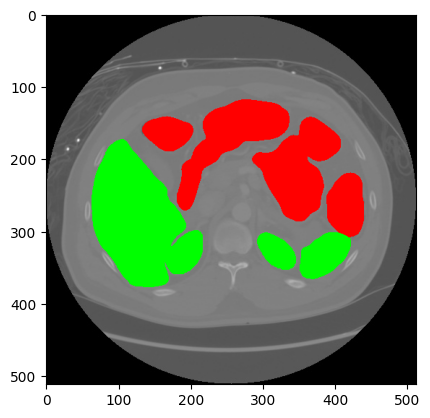

In [151]:
import matplotlib.pyplot as plt 
import cv2
img_data = cv2.imread(img)
import copy
img_masked = copy.deepcopy(img_data)
import numpy as np


mask_background = np.zeros((len(img_data), len(img_data[0])), dtype=np.uint8)
for idx in range(len(gt_masks)):
    #if idx>4: continue
    mask_img = cv2.fillPoly(np.zeros((len(img_data), len(img_data[0])), dtype=np.uint8),\
         pts=np.int32(np.array(gt_masks[idx]).reshape(1, -1, 2)),color=(128,128,128))
     
    for i in range(len(img_masked)):
        for j in range(len(img_masked[0])):
            if mask_img[i][j] != 0:
                img_masked[i][j][0] = 255 - labels[idx]*255
                img_masked[i][j][1] = labels[idx]*255
                img_masked[i][j][2] = 0
    #img_masked = cv2.rectangle(np.array(img_masked), np.int32(bboxes[idx][2:]),np.int32(bboxes[idx][:2]), color=(0,255,0), thickness=2)
plt.imshow(img_masked)


In [ ]:
import numpy as np
import os
output = np.load("work_dir/output.pkl", allow_pickle=True)


In [ ]:
output[0][0]

[array([[3.7624915e+02, 6.8570549e+01, 5.0524771e+02, 3.5745612e+02,
         9.9636710e-01],
        [0.0000000e+00, 2.5727725e+02, 5.8469410e+01, 3.1176865e+02,
         6.0112149e-01],
        [3.5193777e+02, 8.9649887e+01, 4.1325998e+02, 3.3698633e+02,
         5.8213478e-01],
        [4.7013300e+02, 8.6639526e+01, 5.1425677e+02, 1.4058621e+02,
         2.6416922e-01],
        [3.5503983e+02, 1.0772258e+02, 4.0470486e+02, 2.4962143e+02,
         1.7982924e-01],
        [3.5492590e+02, 1.0127138e+02, 4.0915143e+02, 1.8227080e+02,
         1.1025770e-01],
        [3.5777426e+02, 9.5239960e+01, 3.9889484e+02, 1.4542039e+02,
         1.0874896e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[1.1055416e+00, 2.2593523e+02, 5.9484638e+01, 2.5276532e+02,
         2.1480377e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([]

In [ ]:
output[0][1]

In [ ]:
plt

<module 'matplotlib.pyplot' from 'e:\\Anaconda\\envs\\tt\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
gt_masks = [[[315.69, 404.93, 286.91, 387.66, 289.78, 373.27, 353.11, 369.43, 339.68, 274.43, 268.67, 270.59, 293.62, 155.45, 293.62, 113.23, 317.61, 91.16, 339.68, 92.12, 339.68, 143.93, 357.91, 150.65, 361.75, 198.63, 358.87, 202.47, 379.02, 271.55, 371.35, 276.35, 356.95, 228.37, 351.2, 227.41, 356.95, 258.12, 374.22, 308.02, 374.22, 355.99, 399.17, 402.05, 362.71, 396.29, 362.71, 372.31, 359.83, 347.36, 357.91, 312.81, 350.24, 314.73, 360.79, 379.98, 312.81, 401.09]], [[239.4, 275.76, 267.54, 275.76, 276.17, 268.96, 278.43, 269.86, 273.44, 275.76, 291.6, 276.67, 290.24, 273.5, 291.14, 268.96, 292.96, 268.96, 298.86, 274.86, 308.39, 273.95, 313.84, 278.49, 332.45, 279.85, 336.08, 283.48, 336.08, 362.0, 331.54, 369.72, 314.75, 369.27, 309.3, 371.54, 299.77, 373.81, 298.41, 372.9, 243.94, 363.37, 241.22, 363.82, 236.68, 362.46, 236.68, 360.64, 229.87, 356.1, 231.23, 309.81, 233.95, 284.84, 235.77, 280.3, 238.49, 277.13]]]

In [ ]:
gt_mask =[ 99, 254,  98, 254,  97, 254,  96, 254,  95, 254,  94, 254,  93,
        254,  93, 253,  92, 253,  91, 253,  91, 252,  90, 252,  90, 251,
         90, 250,  89, 250,  89, 249,  89, 248,  88, 248,  88, 247,  88,
        246,  87, 246,  87, 245,  87, 244,  87, 243,  87, 242,  87, 241,
         87, 240,  87, 239,  87, 238,  87, 237,  87, 236,  87, 235,  87,
        234,  87, 233,  87, 232,  87, 231,  87, 230,  87, 229,  87, 228,
         87, 227,  88, 226,  88, 226,  89, 225,  89, 225,  90, 224,  90,
        224,  91, 223,  92, 223,  92, 224,  93, 224,  93, 225,  94, 225,
         94, 226,  95, 226,  95, 227,  96, 227,  96, 228,  96, 229,  97,
        229,  97, 230,  98, 230,  98, 231,  98, 232,  99, 232,  99, 233,
        100, 233, 100, 234, 100, 235, 101, 235, 101, 236, 101, 237, 101,
        238, 102, 238, 102, 239, 103, 239, 103, 240, 103, 241, 103, 242,
        104, 242, 104, 243, 104, 244, 104, 245, 104, 246, 104, 247, 105,
        247, 105, 248, 105, 249, 105, 250, 105, 250, 104, 251, 104, 251,
        103, 252, 103, 252, 102, 252, 101, 253, 101, 253, 100, 253,  99,
        254,  99, 254]

In [ ]:
gt_mask = [ 63, 194,  62, 194,  61, 194,  60, 194,  59, 194,  58, 194,  57,
        194,  56, 194,  56, 193,  55, 193,  54, 193,  54, 192,  53, 192,
         52, 192,  51, 192,  51, 191,  50, 191,  50, 190,  49, 190,  48,
        190,  48, 189,  47, 189,  46, 189,  45, 189,  45, 188,  44, 188,
         44, 187,  43, 187,  43, 186,  42, 186,  42, 185,  41, 185,  40,
        185,  40, 184,  39, 184,  39, 183,  38, 183,  38, 182,  38, 181,
         37, 181,  37, 180,  37, 179,  36, 179,  36, 178,  36, 177,  36,
        176,  36, 175,  35, 175,  35, 174,  35, 173,  35, 172,  35, 171,
         35, 170,  34, 170,  34, 169,  34, 168,  34, 167,  34, 166,  34,
        165,  34, 164,  34, 163,  34, 162,  34, 161,  34, 160,  34, 159,
         35, 158,  35, 158,  35, 157,  35, 156,  35, 155,  35, 154,  36,
        153,  36, 153,  36, 152,  36, 151,  36, 150,  36, 149,  37, 148,
         37, 148,  37, 147,  37, 146,  38, 145,  38, 145,  38, 144,  39,
        143,  39, 143,  39, 142,  39, 141,  40, 140,  40, 140,  40, 139,
         40, 138,  41, 137,  41, 137,  41, 136,  42, 135,  42, 135,  43,
        134,  43, 134,  44, 133,  44, 133,  45, 132,  46, 132,  47, 132,
         47, 132,  48, 131,  49, 131,  50, 131,  51, 131,  52, 131,  53,
        131,  53, 132,  54, 132,  55, 132,  55, 133,  56, 133,  56, 134,
         57, 134,  57, 135,  57, 136,  58, 136,  58, 137,  59, 137,  59,
        138,  59, 139,  59, 140,  59, 141,  59, 142,  59, 143,  59, 144,
         59, 145,  59, 146,  59, 147,  59, 148,  59, 148,  58, 149,  58,
        150,  58, 151,  58, 152,  58, 153,  58, 154,  58, 155,  58, 156,
         58, 157,  58, 158,  58, 159,  58, 160,  58, 161,  58, 161,  57,
        162,  57, 163,  57, 164,  57, 165,  57, 166,  57, 167,  58, 167,
         58, 168,  58, 169,  58, 170,  58, 171,  58, 172,  59, 172,  59,
        173,  59, 174,  59, 175,  60, 175,  60, 176,  60, 177,  60, 178,
         60, 179,  61, 179,  61, 180,  61, 181,  61, 182,  61, 183,  61,
        184,  62, 184,  62, 185,  62, 186,  62, 187,  62, 188,  63, 188,
         63, 189,  63, 190,  63, 191,  63, 192,  63, 193,  63, 194,  63,
        194]

In [76]:
f = open("E:/mmdetection-master/mmdetection-master/mmdet/datasets/data/debug_hubmap_img.txt", "r")
imgs = f.readlines()


KeyboardInterrupt: 

In [75]:

import matplotlib.pyplot as plt 
import cv2

import copy
img_masked = copy.deepcopy(img)
import numpy as np
idx = 9

mask_background = np.zeros((len(img), len(img[0])), dtype=np.uint8)
mask_img = cv2.fillPoly(mask_background, pts=np.int32(np.array(gt_masks[idx]).reshape(1, -1, 2)),color=(128,128,128))

for i in range(len(img_masked)):
    for j in range(len(img_masked[0])):
        if mask_img[i][j] != 0:
            img_masked[i][j][0] = 0
            img_masked[i][j][1] = 0
            img_masked[i][j][2] = 0
plt.imshow(cv2.rectangle(np.array(img_masked), np.int32(bboxes[idx][2:]),np.int32(bboxes[idx][:2]), color=(0,255,0), thickness=2))

plt.imshow(img)

IndexError: list index out of range

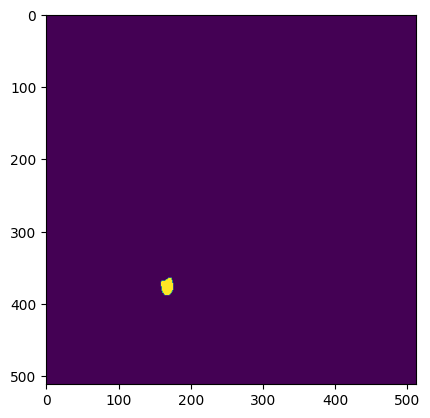

In [ ]:
coordinates = "170 388 169 388 168 388 167 388 166 388 165 388 164 388 164 387 163 387 163 386 163 385 162 385 161 385 161 384 161 383 161 382 160 382 160 381 160 380 160 379 160 378 160 377 160 376 159 376 159 375 159 374 159 373 159 372 159 371 159 370 160 369 161 369 162 369 163 369 164 369 164 369 165 368 165 368 166 367 167 367 168 367 168 367 168 366 169 365 170 365 171 365 172 365 173 365 173 366 173 367 173 368 174 368 174 369 174 370 174 371 174 372 175 372 175 373 175 374 175 375 175 376 175 377 175 378 175 379 175 380 175 381 175 381 174 382 174 383 174 383 173 384 173 385 173 385 172 386 172 386 171 387 171 387 170 388 170 388"
coordinates = [np.int32(x) for x in coordinates.split()]
mask_img = cv2.fillPoly(np.zeros((len(img), len(img[0])), dtype=np.uint8), 
        pts=np.int32(np.array(coordinates).reshape(1, -1, 2)),color=(128,128,128))
plt.imshow(mask_img)
                        


In [ ]:
import numpy as np
bboxes = "[[268.67  91.16 399.17 404.93] [229.87 268.96 336.08 373.81]]"
boxes = np.array([float(x) for x in bboxes.replace("["," ").replace("]"," ").split()]).reshape(-1,4)

2

In [ ]:
bboxes = [[ 37,   0, 297, 341],
       [405, 398, 432, 511],
       [ 18, 106,  34, 123],
       [ 73, 258,  89, 276],
       [311, 405, 328, 419],
       [297, 461, 316, 511],
       [ 65, 352,  76, 370],
       [294, 359, 307, 397],
       [ 37,   0, 297, 341],
       [244, 424, 282, 450],
       [132, 332, 166, 365],
       [  0, 236,  15, 255],
       [483, 187, 498, 198],
       [ 12, 399,  30, 416],
       [361, 398, 381, 416],
       [494, 424, 511, 447],
       [196, 347, 252, 392],
       [171,   0, 193,  17]]

In [ ]:
boxes[0][2:]

array([399.17, 404.93])

In [ ]:

import copy
img_masked = copy.deepcopy(img)
import numpy as np
idx = 9

mask_background = np.zeros((len(img), len(img[0])), dtype=np.uint8)
mask_img = cv2.fillPoly(mask_background, pts=np.int32(np.array(gt_masks[idx]).reshape(1, -1, 2)),color=(128,128,128))

for i in range(len(img_masked)):
    for j in range(len(img_masked[0])):
        if mask_img[i][j] != 0:
            img_masked[i][j][0] = 0
            img_masked[i][j][1] = 0
            img_masked[i][j][2] = 0
plt.imshow(cv2.rectangle(np.array(img_masked), np.int32(bboxes[idx][2:]),np.int32(bboxes[idx][:2]), color=(0,255,0), thickness=2))



IndexError: list index out of range

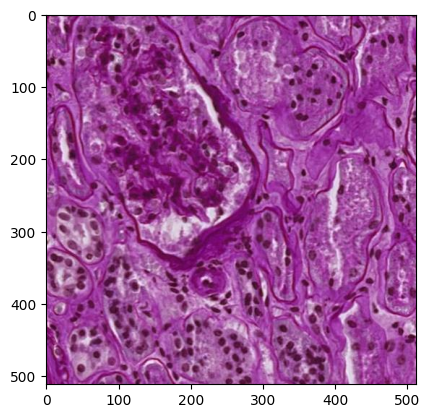

In [ ]:

plt.imshow(img)

In [ ]:
np.broadcast_to(mask_img,(512,512,3))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (512,512)  and requested shape (512,512,3)